# Transaction Data
Below is the analysis of the Transactions data. The analysis includes reviewing the data to clean and making necessary changes to increase reliability for analysis

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns

/kaggle/input/kpmg-virtualinternship/KPMG (1).xlsx


In [4]:
RawData= pd.ExcelFile("/kaggle/input/kpmg-virtualinternship/KPMG (1).xlsx")

In [5]:
Transactions = pd.read_excel(RawData, 'Transactions')

In [6]:
Transactions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

**Looks like Online_order, Brand, Product_line, Product_class, Standard_cost and Product_first_sold_date are all missing values**

Product First Sold Date is Float- need to change to Date

In [7]:
Transactions['product_first_sold_date']

0        41245.0
1        41701.0
2        36361.0
3        36145.0
4        42226.0
          ...   
19995    37823.0
19996    35560.0
19997    40410.0
19998    38216.0
19999    36334.0
Name: product_first_sold_date, Length: 20000, dtype: float64

In [8]:
#convert date column from float to datetime
Transactions['product_first_sold_date'] = pd.to_datetime(Transactions['product_first_sold_date'], unit='s')

In [9]:
Transactions.head(100)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 10:02:25
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 11:43:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,1,1778,2017-02-21,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,1970-01-01 11:17:29
96,97,80,211,2017-05-31,1.0,Approved,OHM Cycles,Touring,low,medium,1073.07,933.84,1970-01-01 10:38:59
97,98,49,333,2017-06-23,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,1970-01-01 10:30:23
98,99,95,32,2017-03-26,0.0,Approved,Giant Bicycles,Standard,medium,large,569.56,528.43,1970-01-01 10:31:14


**Values do not make sense as it currently shows that all products are sold on exact date of 1970-01-01 at various times of the day**

In [10]:
#Checking for null values
Transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

**7 columns are missing values**

In [11]:
#Checking for duplicate values
Transactions.duplicated().sum()

0

No Duplicates Found

In [12]:
#check for uniqueness of each column
Transactions.nunique() 

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

In [13]:
Transactions['transaction_date'].dt.year.value_counts()

2017    20000
Name: transaction_date, dtype: int64

In [14]:
Transactions['online_order'].value_counts()

1.0    9829
0.0    9811
Name: online_order, dtype: int64

There seems to be Missing Values 

In [15]:
Transactions[(Transactions['online_order'] !=1.0)&(Transactions['online_order'] !=0.0)]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
97,98,49,333,2017-06-23,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,1970-01-01 10:30:23
166,167,90,3177,2017-04-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,1970-01-01 10:41:22
169,170,6,404,2017-10-16,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,1970-01-01 10:30:38
250,251,63,1967,2017-04-11,NaN,Approved,Solex,Standard,medium,medium,1483.20,99.59,1970-01-01 11:42:25
300,301,78,2530,2017-03-24,NaN,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 09:50:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19514,19515,51,690,2017-01-22,NaN,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,1970-01-01 10:30:23
19573,19574,18,1735,2017-01-15,NaN,Approved,Solex,Standard,medium,medium,575.27,431.45,1970-01-01 11:29:05
19580,19581,49,1933,2017-10-12,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,1970-01-01 11:24:24
19635,19636,98,1389,2017-07-26,NaN,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,1970-01-01 10:33:22


Above orders are missing values for Online_order columns. This could mean that there are other means of ordering the bikes. Count Assign another value for the missing value indicating other modes

In [16]:
Transactions['online_order'] =Transactions['online_order'].fillna(2.0)
Transactions['online_order'].value_counts()

1.0    9829
0.0    9811
2.0     360
Name: online_order, dtype: int64

In [17]:
Transactions['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

# We know that below are missing values - but we can still check the exisiting values
* Online_order, 
* Brand, 
* Product_line, 
* Product_class, 
* Standard_cost  
* Product_first_sold_date


Depending on the requirement we can either remove the values or replace it with "Other"

In [18]:
Transactions['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [19]:
Transactions['brand'].value_counts().sum()

19803

Missing Values for Brand

**Fill in Missing Value as "Other"**

In [20]:
Transactions['brand']=Transactions['brand'].fillna("Other")
Transactions['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Other              197
Name: brand, dtype: int64

197 missing brand type 

In [21]:
Transactions['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [22]:
Transactions['product_line'].value_counts().sum()

19803

In [23]:
Transactions['product_line']=Transactions['product_line'].fillna("Other")
Transactions['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Other         197
Name: product_line, dtype: int64

In [26]:
Transactions['product_class'].value_counts().sum()

19803

In [24]:
Transactions['product_size'].value_counts().sum()

19803

In [25]:
Transactions['product_size'].value_counts().sum()

19803

In [27]:
Transactions['standard_cost'].value_counts()

388.920000    465
954.820000    396
53.620000     274
161.600000    235
260.140000    233
             ... 
151.960000    124
206.350000    114
312.735016      1
270.299988      1
667.400024      1
Name: standard_cost, Length: 103, dtype: int64

Mean and Median of Standard Cost

In [28]:
Transactions['standard_cost'].mean(), Transactions['standard_cost'].median()

(556.0469512209312, 507.58)

In [29]:
Transactions['product_first_sold_date']

0       1970-01-01 11:27:25
1       1970-01-01 11:35:01
2       1970-01-01 10:06:01
3       1970-01-01 10:02:25
4       1970-01-01 11:43:46
                ...        
19995   1970-01-01 10:30:23
19996   1970-01-01 09:52:40
19997   1970-01-01 11:13:30
19998   1970-01-01 10:36:56
19999   1970-01-01 10:05:34
Name: product_first_sold_date, Length: 20000, dtype: datetime64[ns]

# Graphical Representation

KDE (Kernal Density Estimate) plot to visualize the density of the list_price of the bikes sold

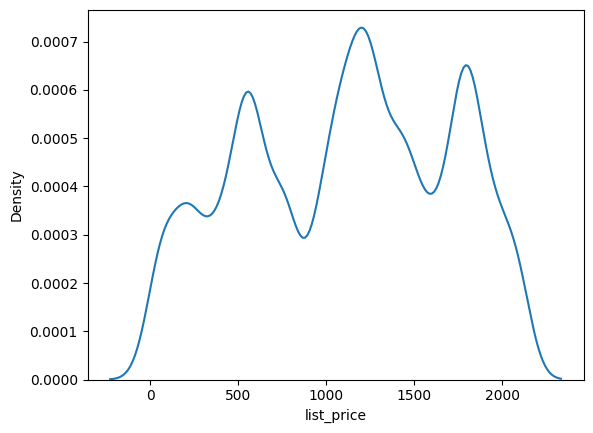

In [30]:
ax = sns.kdeplot(data=Transactions, x="list_price")

Histogram of Standard Cost of the Bikes sold

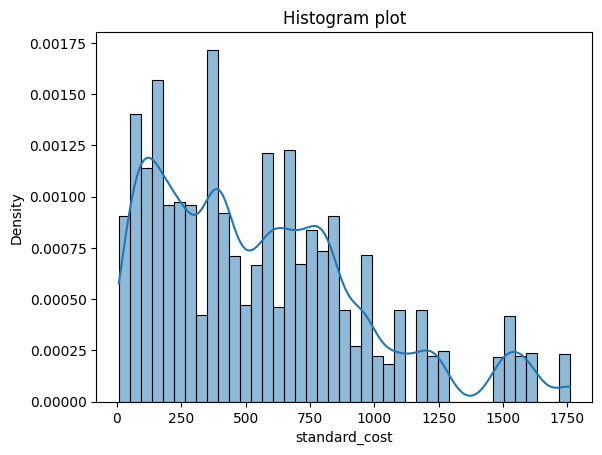

In [31]:
sns.histplot(x='standard_cost', data=Transactions,stat="density", kde=True)
plt.title("Histogram plot")
plt.show()

Tail of the graph is stretching to the right indicating a positive skew 

Histogram plot of the Count of Brands sold

<AxesSubplot: xlabel='brand', ylabel='Count'>

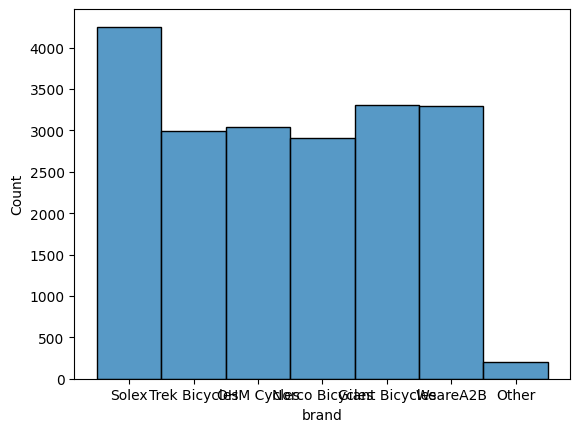

In [32]:
sns.histplot(x=Transactions['brand'])

Fixing the axis labels to view easily

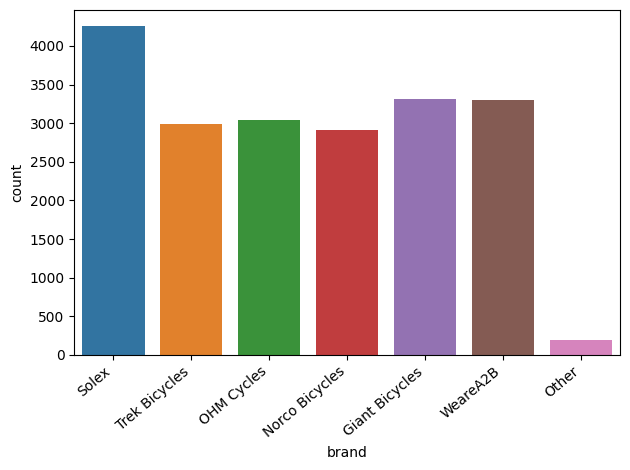

In [33]:
ax=sns.countplot(x="brand",data=Transactions)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()